Problem Statement: Student Grade Prediction.
Predict the final grade of Portugese high school students

In [2]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs ()
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

studgrade = pd.read_csv("student-mat.csv")  # Load in the dataset as studgrade  

In [3]:
#check the values in loaded Dataset
studgrade.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


So procedding for any kind regression need to check the deatils of the file and perform the EDA

In [4]:
# Review the datatypes of the given dataset
studgrade.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [5]:
#checking the null values in the data and the percentage of null values
total = studgrade.isnull().sum().sort_values(ascending=False)
percent = (studgrade.isnull().sum()/studgrade.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

            Total  Percent
G3              0      0.0
schoolsup       0      0.0
sex             0      0.0
age             0      0.0
address         0      0.0
famsize         0      0.0
Pstatus         0      0.0
Medu            0      0.0
Fedu            0      0.0
Mjob            0      0.0
Fjob            0      0.0
reason          0      0.0
guardian        0      0.0
traveltime      0      0.0
studytime       0      0.0
failures        0      0.0
famsup          0      0.0
G2              0      0.0
paid            0      0.0
activities      0      0.0
nursery         0      0.0
higher          0      0.0
internet        0      0.0
romantic        0      0.0
famrel          0      0.0
freetime        0      0.0
goout           0      0.0
Dalc            0      0.0
Walc            0      0.0
health          0      0.0
absences        0      0.0
G1              0      0.0
school          0      0.0


So from the above we can say there is no missing values present in the data

In [6]:
studgrade.describe(include = 'all')      # Descriptive statistics for the numerical variables

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,395,395,395.000000,395.000000,395.000000,395,395,395,395,395,395,395,395,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,yes,yes,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,145,273,NaN,NaN,NaN,344,242,214,201,314,375,329,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,NaN,NaN,1.448101,2.035443,0.334177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,NaN,NaN,0.697505,0.839240,0.743651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


Initial Observations:

1)Number of schools in the given data is 2

2)Among the two schools the count of GP is more(349 among 395)

3)Number of sex present is 2 and number of F(Female) students are more(208 among 395)

4)Age is between 15 to 22

5)In the data lots of categorical variables are there.We need to do proper dummification of them.

Let us generate pandas profiling to check whether the observations are correct or not.

In [6]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(studgrade)
profile.to_file(output_file="studgradeoutputfile.html")                              # HTML file will be downloaded to your workspace

From the html file we can see there is highly corelation between G1,G2 and G3.Let us draw the heatmap to understand the corelation.

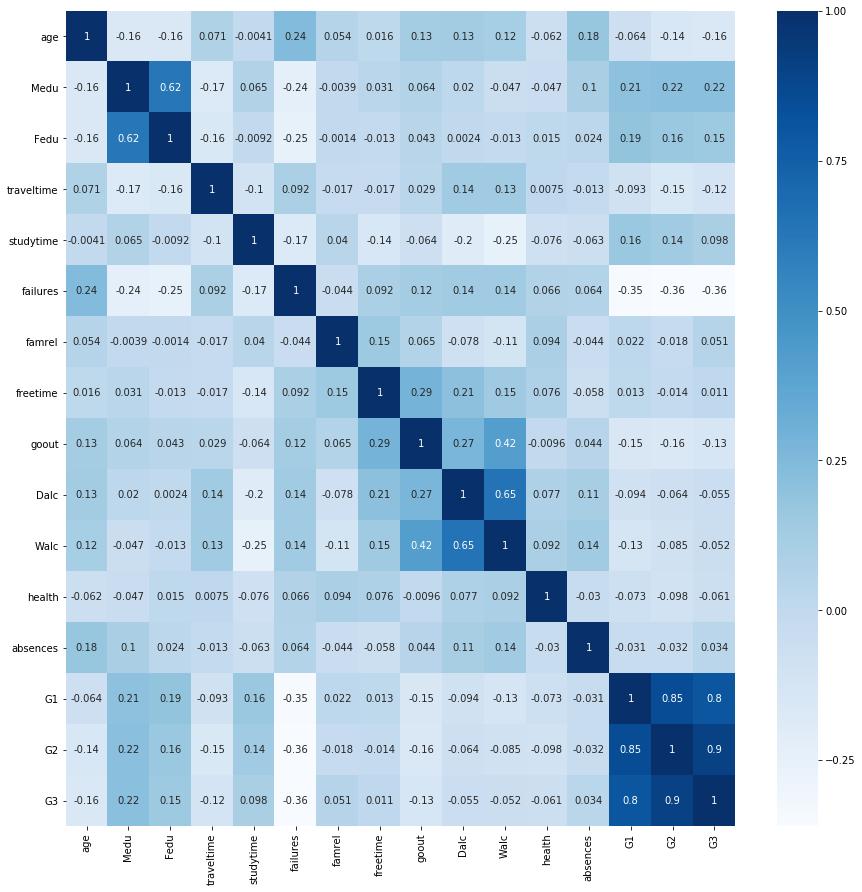

In [7]:
plt.figure(figsize=(15, 15))

sns.heatmap(studgrade.corr(), annot=True,cmap='Blues' );

So from the above map we can say there is high corelation between GI,G2,G3

From the description of column we know:
G1first period grade (numeric: from 0 to 20)
G2second period grade (numeric: from 0 to 20)
G3final grade (numeric: from 0 to 20)

Taking the average of three grade and introduing a new column AvgGrade

In [8]:
studgrade['AvgGrade']=(studgrade['G1']+studgrade['G2']+studgrade['G3']/3)

Dropping G1,G2 and G3 as the grade will be considered now based on AvgGrade

In [9]:
studgrade.drop(['G1','G2','G3'],axis=1,inplace=True)

In [10]:
studgrade.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,AvgGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,13.000000
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,12.000000
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,18.333333
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,34.000000
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,19.333333


For linear regreesion there should not be any corelation between independent variables.From the above heatmap we can see there is corelation between gout,Dalc,Walc and freetime.So dropping the three column gout,Walc,Dalc.

Plotting the heatmap again

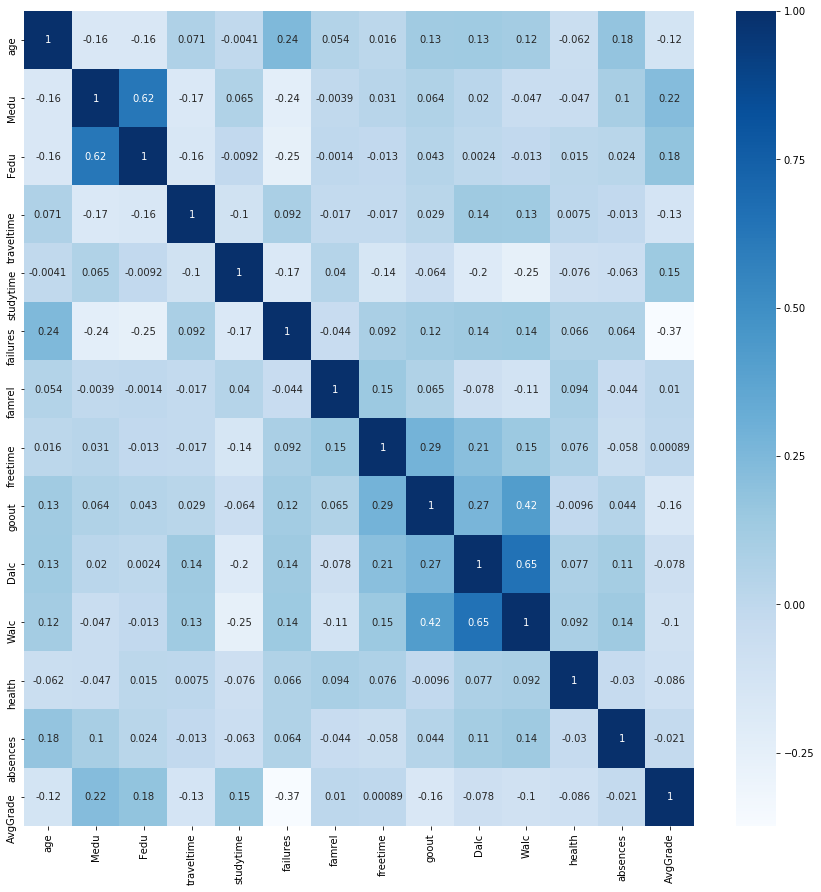

In [11]:
plt.figure(figsize=(15, 15))

sns.heatmap(studgrade.corr(), annot=True,cmap='Blues' );

Visualising Pairwise correlation

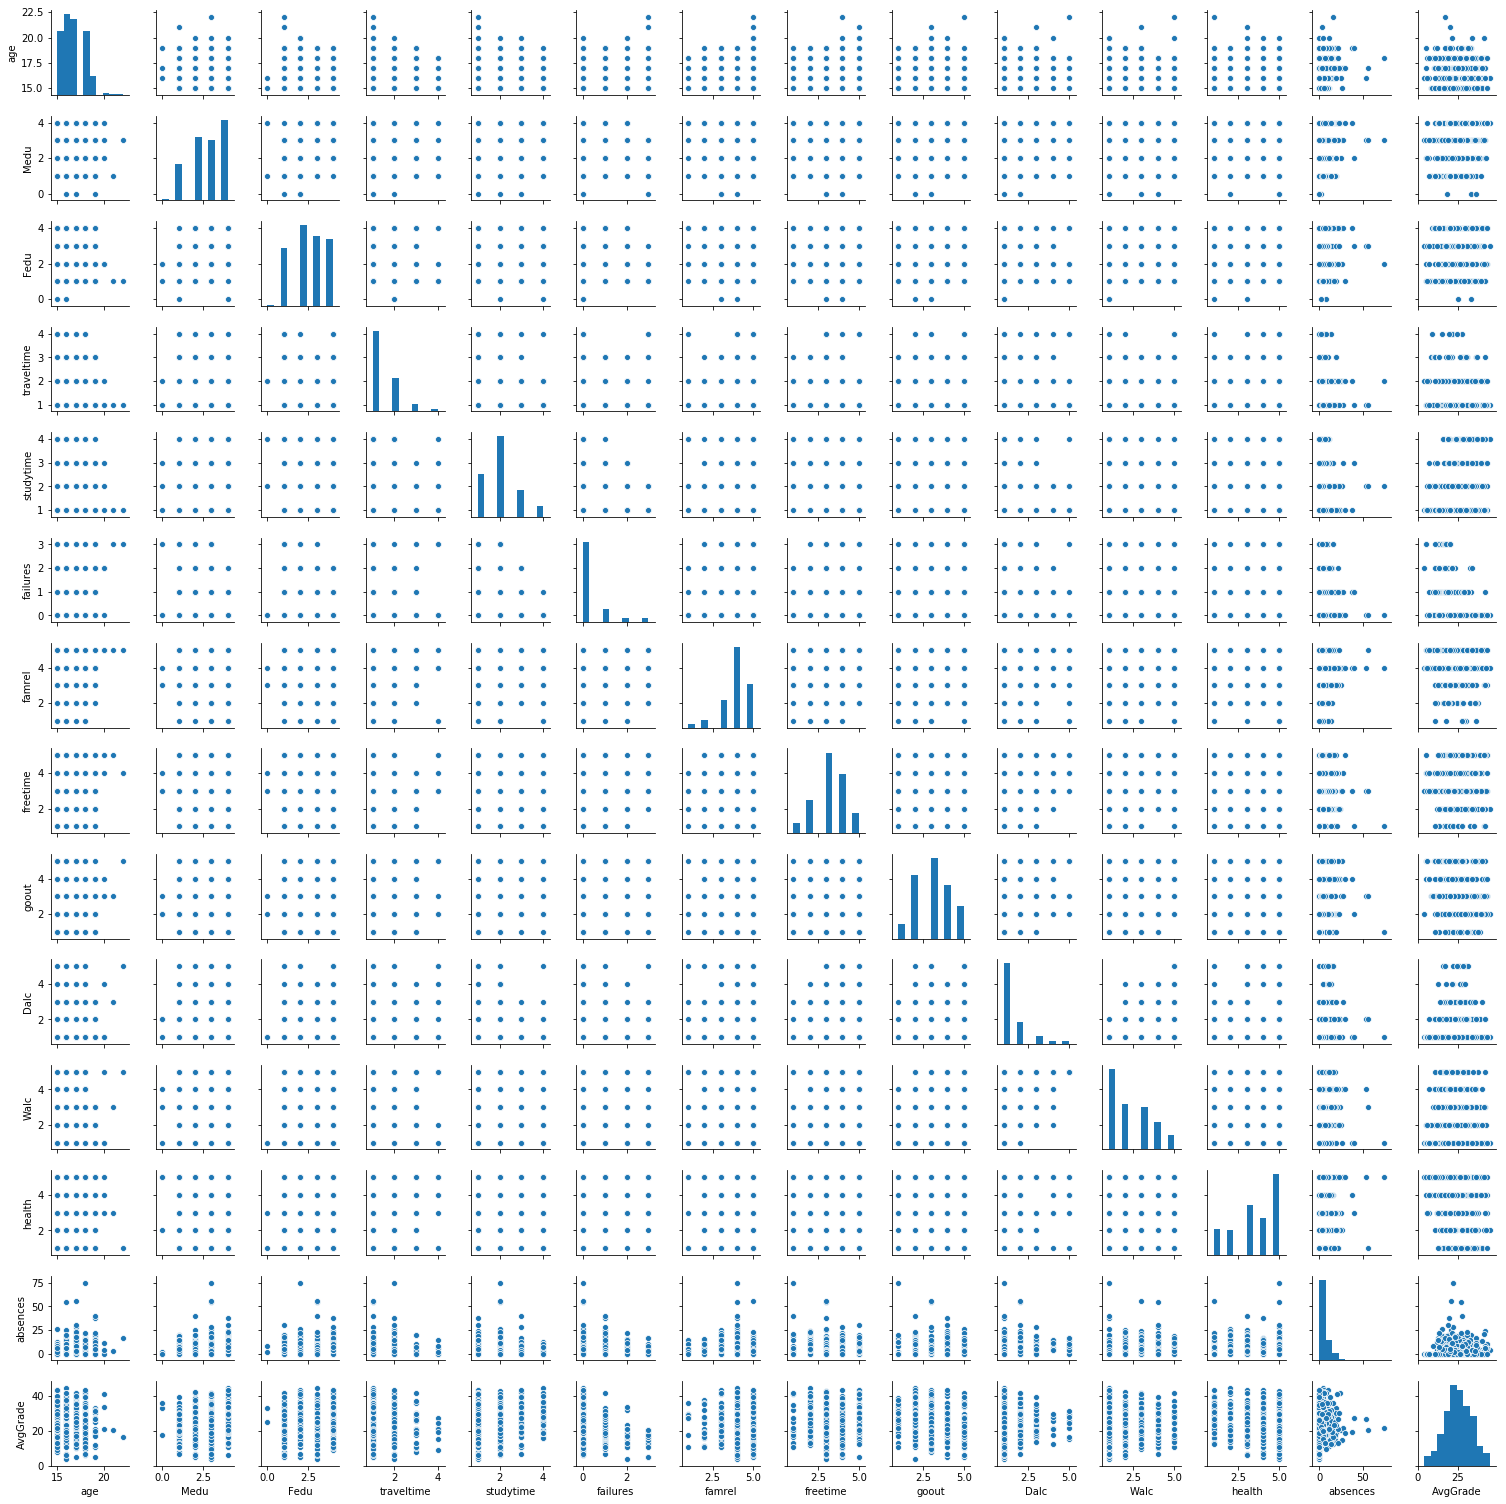

In [12]:
sns.pairplot(studgrade,size = 1.5, aspect = 1)

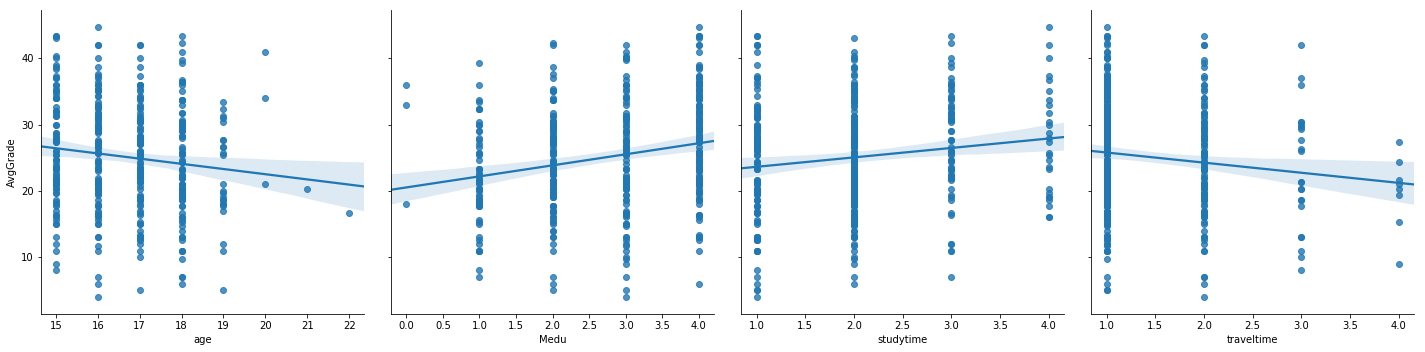

In [13]:
sns.pairplot(studgrade, x_vars=['age', 'Medu','studytime','traveltime'], y_vars='AvgGrade', size=5, aspect=1, kind='reg')

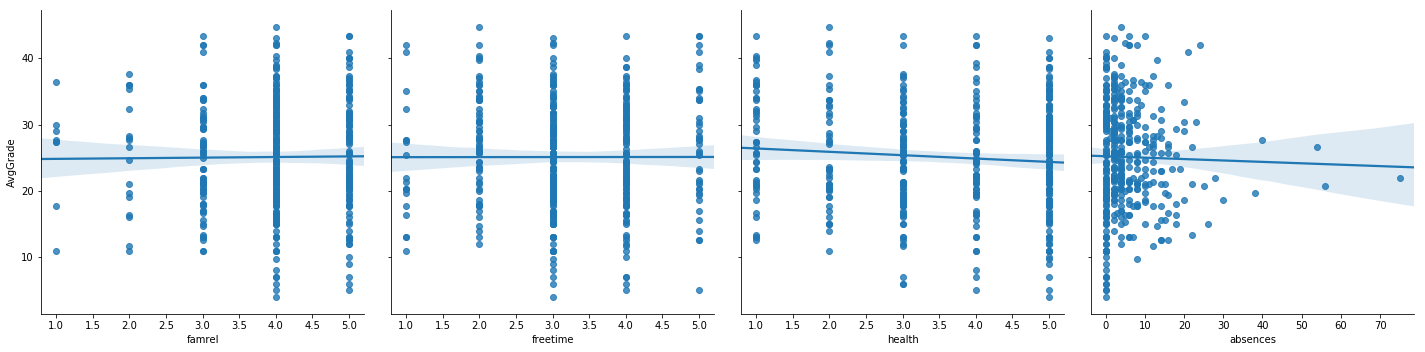

In [14]:
sns.pairplot(studgrade, x_vars=['famrel', 'freetime','health','absences'], y_vars='AvgGrade', size=5, aspect=1, kind='reg')

In [15]:
max(studgrade.AvgGrade)

44.666666666666664

In [16]:
min(studgrade.AvgGrade)

4.0

For decsiontree of the same dataset i am introducing a column grade.
If AvgGrade is <=20 grade is C 
If AvgGrade>20 and AvgGrade<=35 grade is B
If AvgGrade>35 grade is A

In [17]:
grades=[]

for row in studgrade['AvgGrade']:
    if(row <=20):
        grades.append('C')
    elif((row>20) & (row<=35)):
         grades.append('B')
    else:
         grades.append('A')
    

In [18]:
len(grades)

395

In [19]:
studgrade['grades']=grades

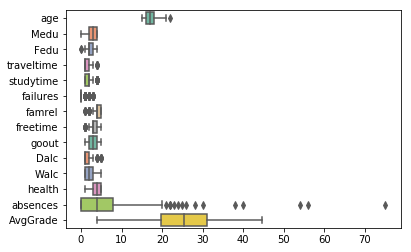

In [20]:
sns.boxplot(data=studgrade,orient="h", palette="Set2")

From the above boxplot we can say outliners are there and maximum present for absences.

Before proceeding for finding any further relation we need to do dummification of the data as many categoriacal variables are present in the data. Need to convert all the data in numeric form.

In [21]:
studgrade.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,AvgGrade,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,13.000000,C
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,12.000000,C
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,18.333333,C
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,34.000000,B
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,19.333333,C


In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
studgrade["school"]=le.fit_transform(studgrade["school"])



In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
studgrade["address"]=le.fit_transform(studgrade["address"])

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
studgrade["famsize"]=le.fit_transform(studgrade["famsize"])

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
studgrade["Pstatus"]=le.fit_transform(studgrade["Pstatus"])

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
studgrade["sex"]=le.fit_transform(studgrade["sex"])

As for Mjob distinct value is 4 we will go for LabelEncoding in this case

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
studgrade["Mjob"]=le.fit_transform(studgrade["Mjob"])


Same doing for Fjob and guardian and reason

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
studgrade["Fjob"]=le.fit_transform(studgrade["Fjob"])

In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
studgrade["guardian"]=le.fit_transform(studgrade["guardian"])

In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
studgrade["reason"]=le.fit_transform(studgrade["reason"])

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
studgrade["grades"]=le.fit_transform(studgrade["grades"])


In [32]:
max(studgrade["grades"])

2

In [33]:
min(studgrade["grades"])

0

In [34]:
data=studgrade

Converting all yes and no to directly 1 and 0.yes=1 and no=0

In [35]:
data.schoolsup.replace(('yes', 'no'), (1, 0), inplace=True)
data.famsup.replace(('yes', 'no'), (1, 0), inplace=True)
data.paid.replace(('yes', 'no'), (1, 0), inplace=True)
data.activities.replace(('yes', 'no'), (1, 0), inplace=True)
data.nursery.replace(('yes', 'no'), (1, 0), inplace=True)
data.higher.replace(('yes', 'no'), (1, 0), inplace=True)
data.internet.replace(('yes', 'no'), (1, 0), inplace=True)
data.romantic.replace(('yes', 'no'), (1, 0), inplace=True)

In [36]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,AvgGrade,grades
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,13.000000,2
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,12.000000,2
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,18.333333,2
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,34.000000,1
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,19.333333,2


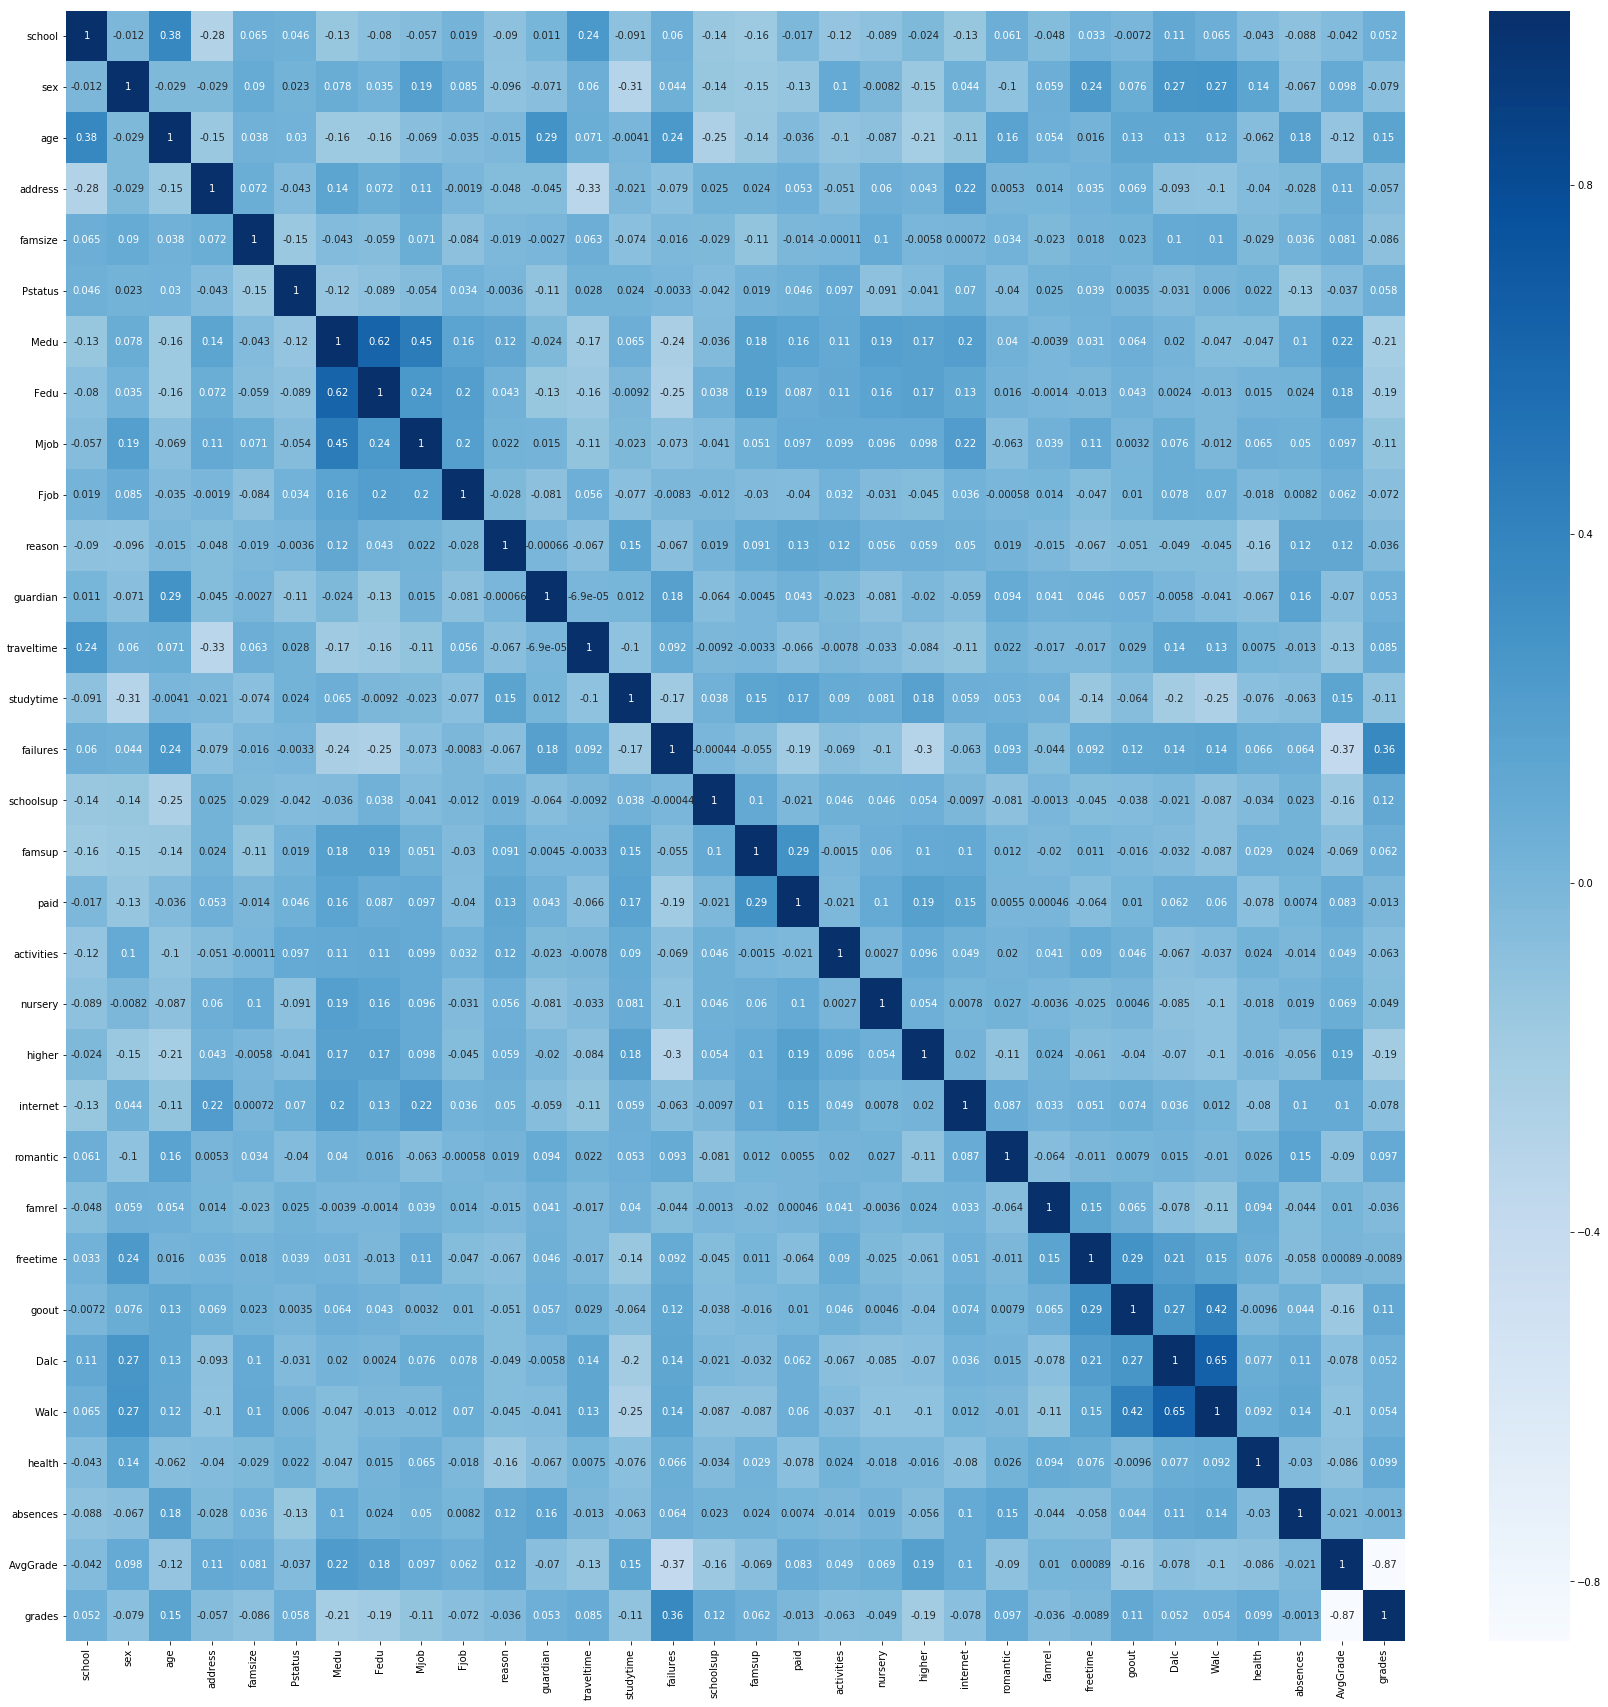

In [37]:
plt.figure(figsize=(30, 30))

sns.heatmap(data.corr(), annot=True,cmap='Blues' );

Check for outliners now

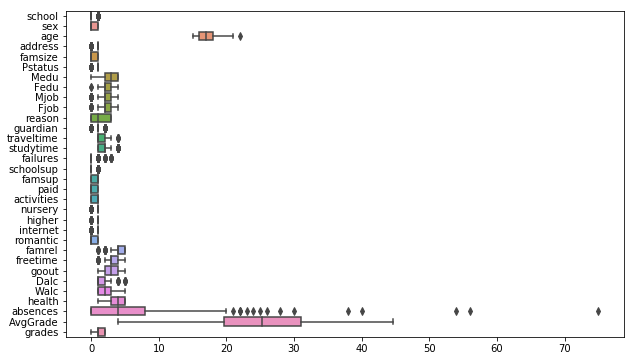

In [38]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=data,orient="h")

As already dummification and labelencoding has been done for all the columns I am dropping the columns which contains string or object values.

In [39]:
data.dtypes

school          int32
sex             int32
age             int64
address         int32
famsize         int32
Pstatus         int32
Medu            int64
Fedu            int64
Mjob            int32
Fjob            int32
reason          int32
guardian        int32
traveltime      int64
studytime       int64
failures        int64
schoolsup       int64
famsup          int64
paid            int64
activities      int64
nursery         int64
higher          int64
internet        int64
romantic        int64
famrel          int64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences        int64
AvgGrade      float64
grades          int32
dtype: object

In [40]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,AvgGrade,grades
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,13.000000,2
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,12.000000,2
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,18.333333,2
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,34.000000,1
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,19.333333,2


Calculate the Inter quantile range and then drop off outliers for quantile values outside 5 to 95 range.

In [41]:
Q1 = data.quantile(0.05)
Q3 = data.quantile(0.95)
Q_diff = Q3 - Q1

data_out = data[~((data < (Q1 - Q_diff))|(data > (Q3 + Q_diff))).any(axis=1)]
data_out.reset_index()

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,AvgGrade,grades
0,0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,13.000000,2
1,1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,12.000000,2
2,2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,18.333333,2
3,3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,34.000000,1
4,4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,19.333333,2
5,5,0,1,16,1,1,1,4,3,3,2,3,1,1,2,0,0,1,1,1,1,1,1,0,5,4,2,1,2,5,10,35.000000,1
6,6,0,1,16,1,1,1,2,2,2,2,1,1,1,2,0,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,27.666667,1
7,7,0,0,17,1,0,0,4,4,2,4,1,1,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,1,1,6,13.000000,2
8,8,0,1,15,1,1,0,3,2,3,2,1,1,1,2,0,0,1,1,0,1,1,1,0,4,2,2,1,1,1,0,40.333333,0
9,9,0,1,15,1,0,1,3,4,2,2,1,1,1,2,0,0,1,1,1,1,1,1,0,5,5,1,1,1,5,0,34.000000,1


In [42]:
data_out.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,AvgGrade,grades
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,13.000000,2
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,12.000000,2
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,18.333333,2
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,34.000000,1
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,19.333333,2


In [43]:
data_out.drop(['AvgGrade'],axis=1,inplace=True)

In [44]:
X = data_out.loc[:,data_out.columns != 'grades']
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4


In [45]:
y = data_out.grades 

Splitting X and y into training and test datasets

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [47]:
print(X_train.shape)
print(y_train.shape)

(259, 30)
(259,)


In [48]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

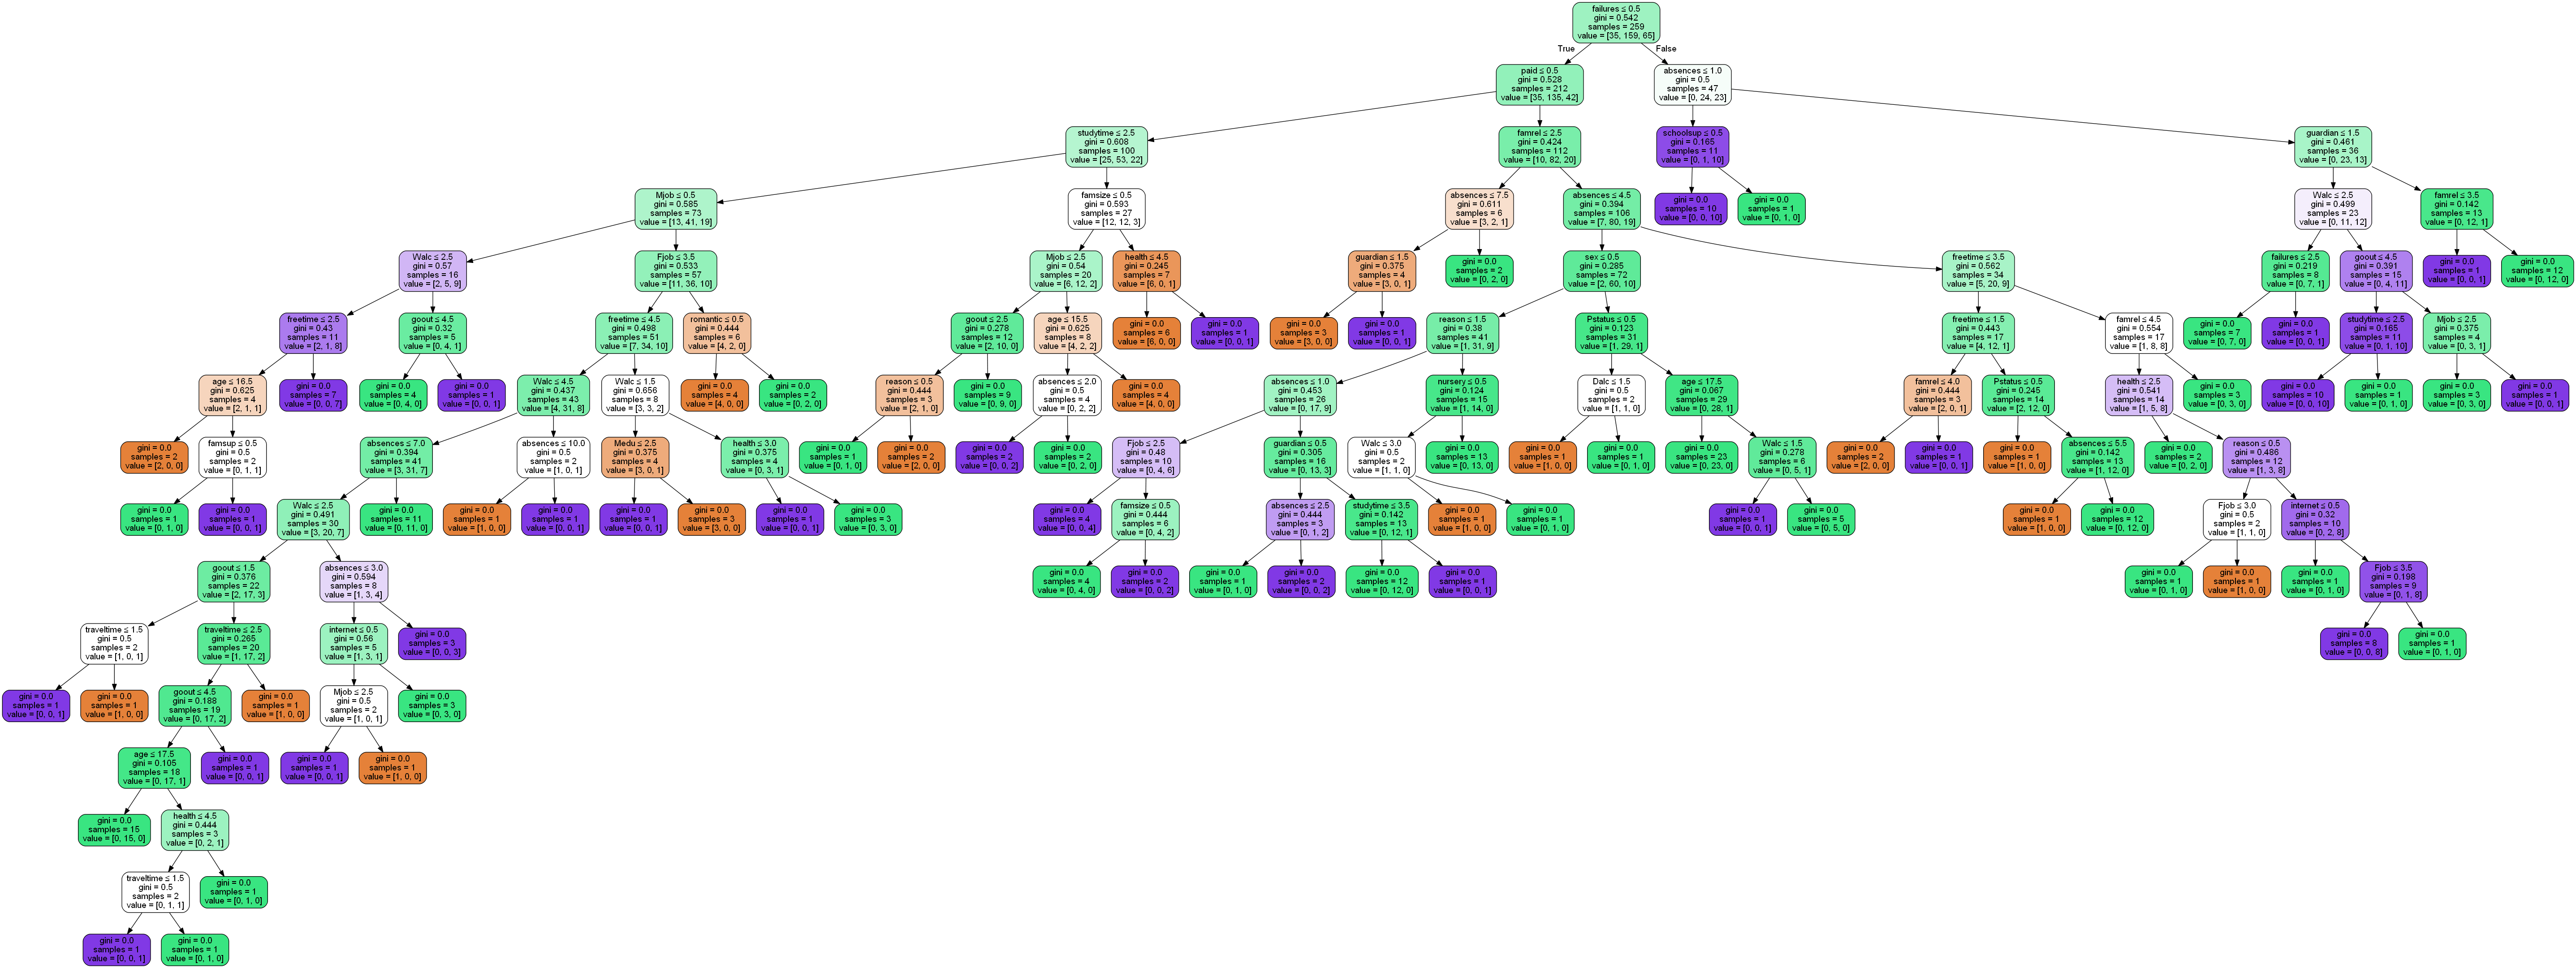

In [49]:
import pydotplus
from IPython.display import Image

dot_tree = tree.export_graphviz(model, out_file=None,filled=True, rounded=True, 
                                special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)  

Image(graph.create_png())


 Using the Model for Prediction

In [50]:
y_pred_train = model.predict(X_train)  

In [51]:
y_pred_test = model.predict(X_test)     

Model Evaluation using accuracy_score

In [52]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.5982142857142857


In [53]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual A','Actual B', 'Actual C']
confusion_matrix.columns = ['Predicted A','Predicted B','Predicted C']
print(confusion_matrix)

          Predicted A  Predicted B  Predicted C
Actual A            4            7            1
Actual B           12           51            9
Actual C            3           13           12


Correct Prediction = 4+51+12=67
Wrong prediction= 7+1+12+9+3+13=35

Decision Tree with Gridsearch

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

E:\AnacondaInstall\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 60), 'max_features': ['sqrt', 'log2', None]}],
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score='warn',
       scoring=None, verbose=0)

Using the model for prediction

In [55]:
y_pred_test1 = grid_search.predict(X_test)

Model Evaluation using accuracy_score

In [56]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data is: 0.6696428571428571


In [58]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Actual A','Actual B', 'Actual C']
confusion_matrix.columns = ['Predicted A','Predicted B','Predicted C']
print(confusion_matrix)

          Predicted A  Predicted B  Predicted C
Actual A            0           12            0
Actual B            0           69            3
Actual C            0           22            6


Correct Prediction = 0+69+6=75 Wrong prediction= 12+3+22=37

So we can say accuracy improved after using gridsearch.